# Random Forest
Neste notebook vamos testar a qualidade do algoritmo Random Forest para a classificação de nódulos

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('final_features.csv')

y = data["malignancy"]
X = data.drop(columns=['malignancy','case_id'])

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Seleção dos hiperparametros e treino do modelo

In [2]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

model = RandomForestClassifier()

# cross-validation para testar os hiperparametros
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=405)


print("Teste com varios ranges, objetivo: saber qual o melhor")
# hiperparametros a testar
param_grid = {
    'n_estimators': [i for i in range (25,201,25)],
    'max_depth': [i for i in range(5,106,10)],
    'min_samples_leaf': [i for i in range(5,26,5)],
    'criterion': ["gini", "entropy", "log_loss"]
}


# definir o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)

# treinar o modelo
grid_search.fit(X_train, y_train)

# resultado
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")

Teste com varios ranges, objetivo: saber qual o melhor
Fitting 10 folds for each of 1320 candidates, totalling 13200 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 105, 'min_samples_leaf': 5, 'n_estimators': 25}
Best CV Score: 0.8609337220075475


## Avaliação do modelo

Test Accuracy:  0.85423197492163
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       765
           1       0.82      0.81      0.82       511

    accuracy                           0.85      1276
   macro avg       0.85      0.85      0.85      1276
weighted avg       0.85      0.85      0.85      1276



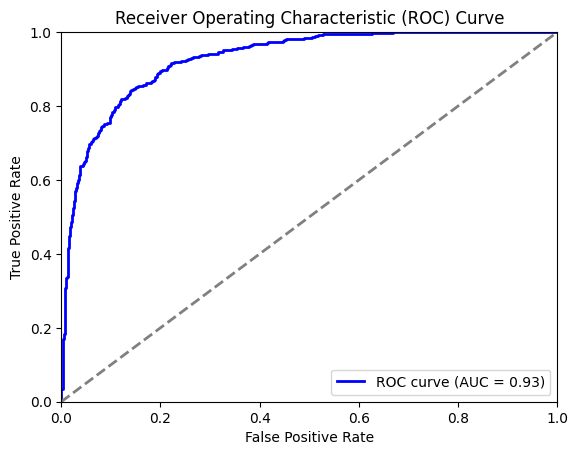

In [3]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

# melhor modelo
model = grid_search.best_estimator_

# classificacao de novos dados
y_pred = model.predict(X_test)

# Evaluate the model on the test data
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))


# Step 12: Calculate the ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 13: Calculate the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Step 14: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()